In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv(r"D:\codesoft\Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
data.isnull().sum().sum()

0

In [7]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
data = pd.get_dummies(data,drop_first = True)
data.head()
data = data.astype(int)
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270,0,0,0,1
9996,516,35,10,57369,1,1,1,101699,0,0,0,1
9997,709,36,7,0,1,0,1,42085,1,0,0,0
9998,772,42,3,75075,2,1,0,92888,1,1,0,1


In [10]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

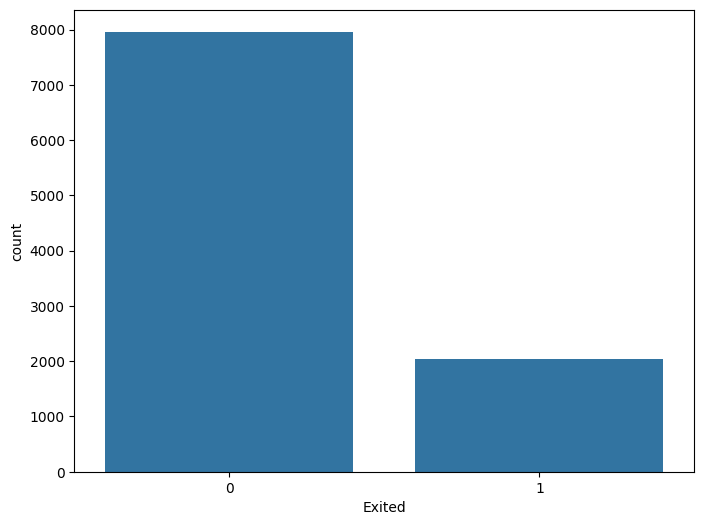

In [11]:
plt.figure(figsize =(8,6))
sns.countplot(x='Exited',data = data)

In [12]:
X = data.drop('Exited',axis=1)
y = data['Exited']

In [13]:
!pip install imblearn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print('Training Shape: ', X_train.shape)
print('Testing Shape: ', X_test.shape)

Training Shape:  (9000, 11)
Testing Shape:  (1000, 11)


In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
X_train_scaled

array([[-0.47944328,  0.19687202, -0.00234647, ..., -0.5761528 ,
        -0.57700814,  0.91105005],
       [ 1.04580863,  1.33803657,  1.03625698, ..., -0.5761528 ,
        -0.57700814, -1.09763453],
       [-0.85297437, -0.08841912,  1.03625698, ..., -0.5761528 ,
         1.73307782,  0.91105005],
       ...,
       [ 0.86941896, -0.08841912, -1.38715108, ..., -0.5761528 ,
        -0.57700814, -1.09763453],
       [ 0.16386025,  0.38706611,  1.03625698, ..., -0.5761528 ,
        -0.57700814,  0.91105005],
       [ 0.47513615,  1.14784248, -1.38715108, ...,  1.73565068,
        -0.57700814,  0.91105005]])

In [18]:
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
LR = LogisticRegression()
LR.fit(X_train_scaled, y_train_classified)

LogisticRegression()

In [19]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy1 = LR.score(X_test_scaled, y_test_classified)
print("Model Accuracy:", accuracy1)

Model Accuracy: 0.809


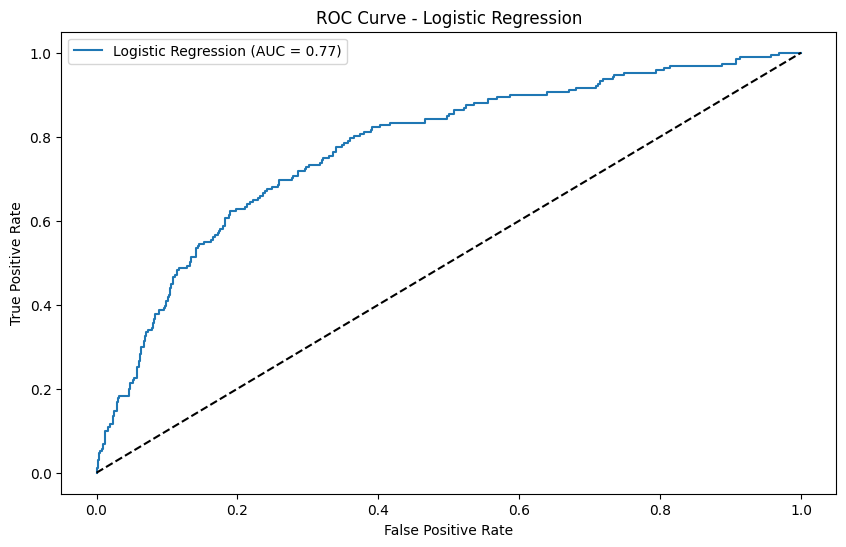

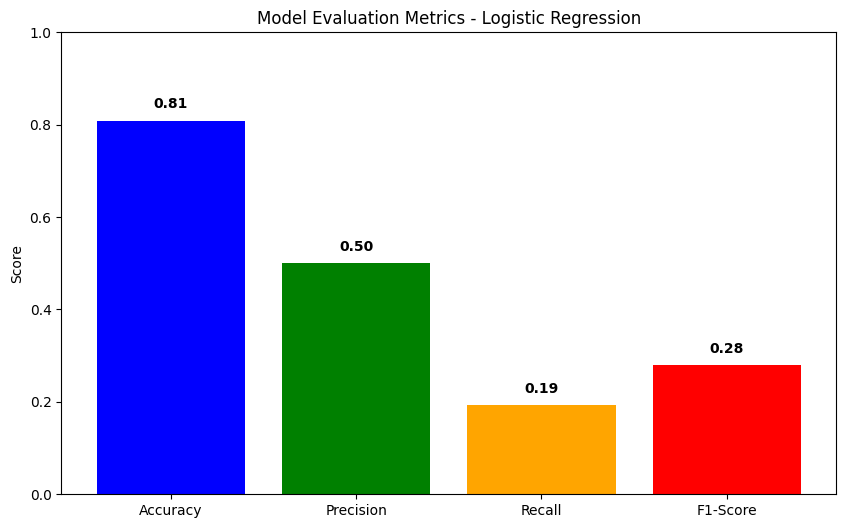

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

# Predict probabilities for ROC curve (Logistic Regression gives probabilities)
y_prob = LR.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test_classified, y_prob)
auc = roc_auc_score(y_test_classified, y_prob)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

# Predict binary classes for performance metrics (using the threshold 0.5)
y_pred = LR.predict(X_test_scaled)

# Calculate Accuracy, Precision, Recall, and F1-Score
accuracy = accuracy_score(y_test_classified, y_pred)
precision = precision_score(y_test_classified, y_pred)
recall = recall_score(y_test_classified, y_pred)
f1 = f1_score(y_test_classified, y_pred)

# Bar chart for Accuracy, Precision, Recall, and F1-Score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.title("Model Evaluation Metrics - Logistic Regression")
plt.ylabel("Score")
plt.ylim(0, 1)
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom', fontweight='bold')
plt.show()


In [19]:
from sklearn import svm
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
svm = svm.SVC()
svm.fit(X_train_scaled, y_train_classified)

SVC()

In [20]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy2 = svm.score(X_test_scaled, y_test_classified)
print("Model Accuracy:", accuracy2)

Model Accuracy: 0.865


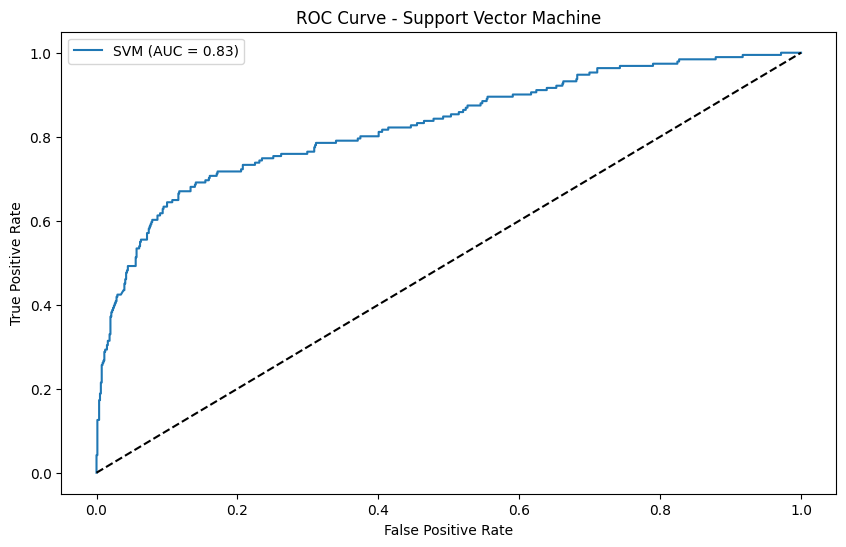

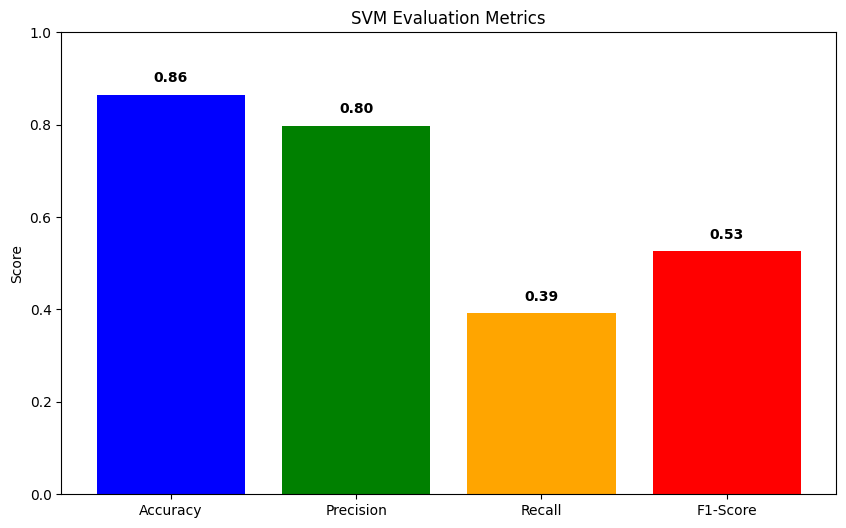

In [22]:
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Initialize and fit the SVM model
svm_model = svm.SVC(probability=True)  # Enable probability estimation for ROC curve
svm_model.fit(X_train_scaled, y_train_classified)

# Predict the class labels for the test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Predict the probabilities for the positive class (required for ROC curve)
y_prob_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

# Calculate accuracy, precision, recall, and F1-score
accuracy_svm = accuracy_score(y_test_classified, y_pred_svm)
precision_svm = precision_score(y_test_classified, y_pred_svm)
recall_svm = recall_score(y_test_classified, y_pred_svm)
f1_svm = f1_score(y_test_classified, y_pred_svm)

# Plot ROC curve
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test_classified, y_prob_svm)
auc_svm = roc_auc_score(y_test_classified, y_prob_svm)

plt.figure(figsize=(10, 6))
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc_svm:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Support Vector Machine")
plt.legend()
plt.show()

# Bar chart for Accuracy, Precision, Recall, and F1-Score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy_svm, precision_svm, recall_svm, f1_svm]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.title("SVM Evaluation Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom', fontweight='bold')
plt.show()


In [21]:
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train_classified)

RandomForestClassifier()

In [22]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy3 = rf.score(X_test_scaled, y_test_classified)
print("Model Accuracy:", accuracy3)

Model Accuracy: 0.865


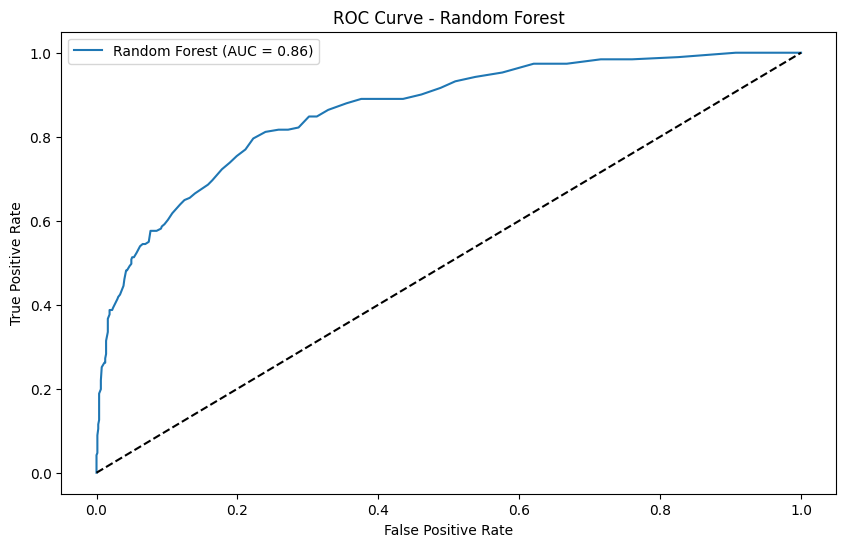

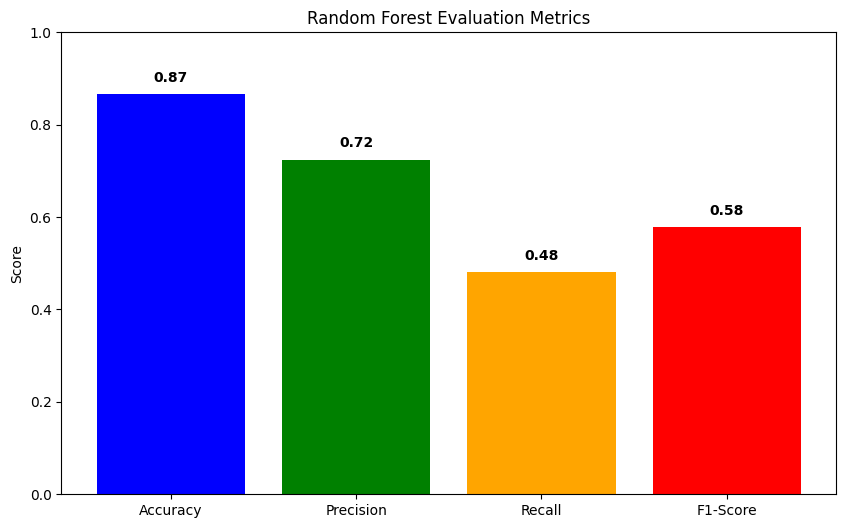

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Initialize and fit the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train_classified)

# Predict the class labels for the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Predict the probabilities for the positive class (required for ROC curve)
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Calculate accuracy, precision, recall, and F1-score
accuracy_rf = accuracy_score(y_test_classified, y_pred_rf)
precision_rf = precision_score(y_test_classified, y_pred_rf)
recall_rf = recall_score(y_test_classified, y_pred_rf)
f1_rf = f1_score(y_test_classified, y_pred_rf)

# Plot ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_classified, y_prob_rf)
auc_rf = roc_auc_score(y_test_classified, y_prob_rf)

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

# Bar chart for Accuracy, Precision, Recall, and F1-Score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy_rf, precision_rf, recall_rf, f1_rf]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.title("Random Forest Evaluation Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom', fontweight='bold')
plt.show()


In [23]:
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
KNN = KNeighborsClassifier()
KNN.fit(X_train_scaled, y_train_classified)

KNeighborsClassifier()

In [24]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy5 = KNN.score(X_test_scaled, y_test_classified)
print("Model Accuracy:", accuracy5)

Model Accuracy: 0.84


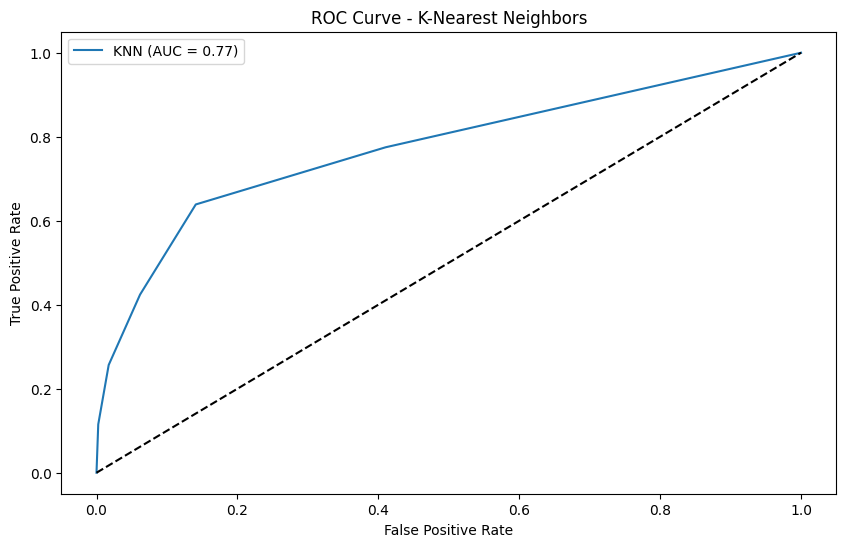

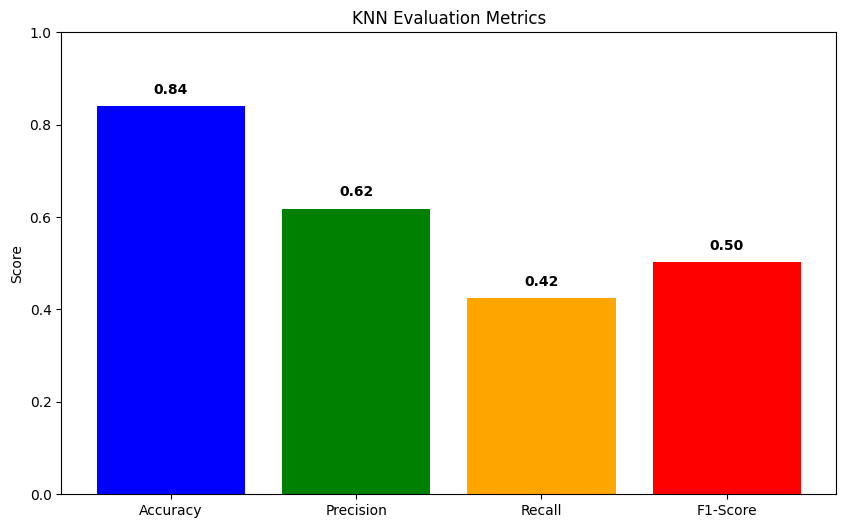

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Initialize and fit the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (default: 5)
knn_model.fit(X_train_scaled, y_train_classified)

# Predict the class labels for the test set
y_pred_knn = knn_model.predict(X_test_scaled)

# Predict the probabilities for the positive class (required for ROC curve)
y_prob_knn = knn_model.predict_proba(X_test_scaled)[:, 1]

# Calculate accuracy, precision, recall, and F1-score
accuracy_knn = accuracy_score(y_test_classified, y_pred_knn)
precision_knn = precision_score(y_test_classified, y_pred_knn)
recall_knn = recall_score(y_test_classified, y_pred_knn)
f1_knn = f1_score(y_test_classified, y_pred_knn)

# Plot ROC curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test_classified, y_prob_knn)
auc_knn = roc_auc_score(y_test_classified, y_prob_knn)

plt.figure(figsize=(10, 6))
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {auc_knn:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - K-Nearest Neighbors")
plt.legend()
plt.show()

# Bar chart for Accuracy, Precision, Recall, and F1-Score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy_knn, precision_knn, recall_knn, f1_knn]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.title("KNN Evaluation Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom', fontweight='bold')
plt.show()


In [25]:
from sklearn.ensemble import GradientBoostingClassifier
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
GBC = GradientBoostingClassifier()
GBC.fit(X_train_scaled, y_train_classified)

GradientBoostingClassifier()

In [26]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy6 = GBC.score(X_test_scaled, y_test_classified)
print("Model Accuracy:", accuracy6)

Model Accuracy: 0.867


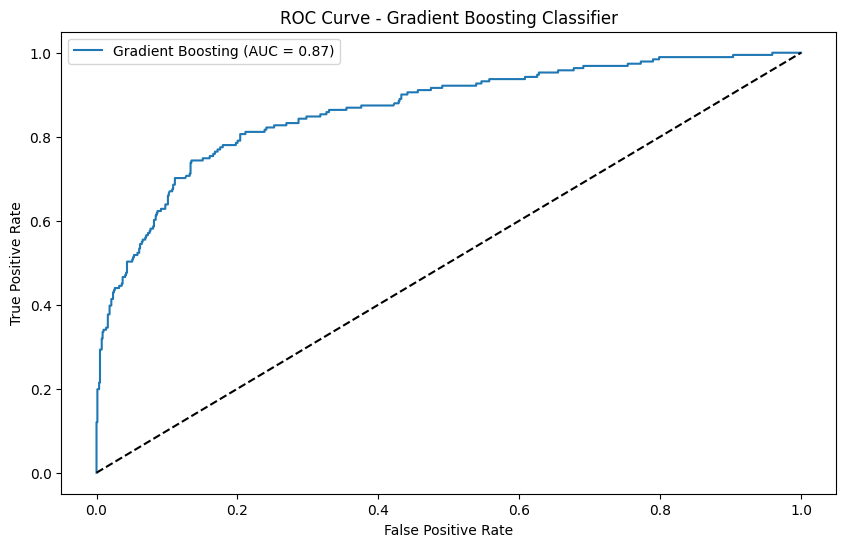

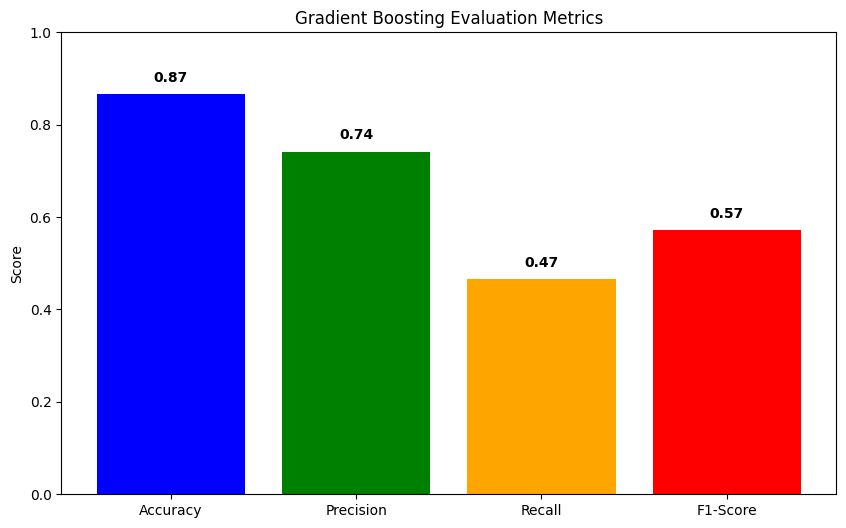

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Initialize and fit the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train_classified)

# Predict the class labels for the test set
y_pred_gb = gb_model.predict(X_test_scaled)

# Predict the probabilities for the positive class (required for ROC curve)
y_prob_gb = gb_model.predict_proba(X_test_scaled)[:, 1]

# Calculate accuracy, precision, recall, and F1-score
accuracy_gb = accuracy_score(y_test_classified, y_pred_gb)
precision_gb = precision_score(y_test_classified, y_pred_gb)
recall_gb = recall_score(y_test_classified, y_pred_gb)
f1_gb = f1_score(y_test_classified, y_pred_gb)

# Plot ROC curve
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test_classified, y_prob_gb)
auc_gb = roc_auc_score(y_test_classified, y_prob_gb)

plt.figure(figsize=(10, 6))
plt.plot(fpr_gb, tpr_gb, label=f"Gradient Boosting (AUC = {auc_gb:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting Classifier")
plt.legend()
plt.show()

# Bar chart for Accuracy, Precision, Recall, and F1-Score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy_gb, precision_gb, recall_gb, f1_gb]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.title("Gradient Boosting Evaluation Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom', fontweight='bold')
plt.show()


In [28]:
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train_classified)

DecisionTreeClassifier()

In [29]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy4 = dt.score(X_test_scaled, y_test_classified)
print("Model Accuracy:", accuracy4)

Model Accuracy: 0.799


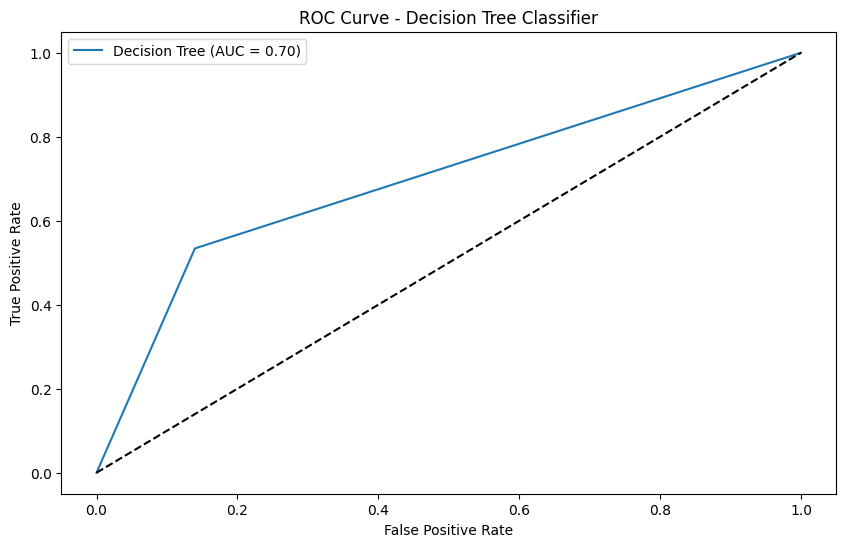

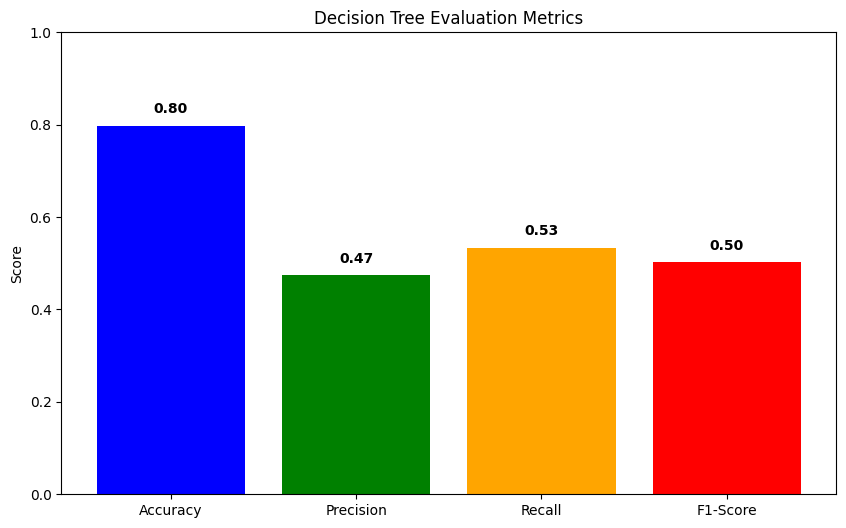

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Initialize and fit the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train_classified)

# Predict the class labels for the test set
y_pred_dt = dt_model.predict(X_test_scaled)

# Predict the probabilities for the positive class (required for ROC curve)
y_prob_dt = dt_model.predict_proba(X_test_scaled)[:, 1]

# Calculate accuracy, precision, recall, and F1-score
accuracy_dt = accuracy_score(y_test_classified, y_pred_dt)
precision_dt = precision_score(y_test_classified, y_pred_dt)
recall_dt = recall_score(y_test_classified, y_pred_dt)
f1_dt = f1_score(y_test_classified, y_pred_dt)

# Plot ROC curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_classified, y_prob_dt)
auc_dt = roc_auc_score(y_test_classified, y_prob_dt)

plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree Classifier")
plt.legend()
plt.show()

# Bar chart for Accuracy, Precision, Recall, and F1-Score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy_dt, precision_dt, recall_dt, f1_dt]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.title("Decision Tree Evaluation Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom', fontweight='bold')
plt.show()


In [31]:
pip install xgboost


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
from xgboost import XGBClassifier
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
xb = XGBClassifier()
xb.fit(X_train_scaled, y_train_classified)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [53]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy7 = xb.score(X_test_scaled, y_test_classified)
print("Model Accuracy:", accuracy7)

Model Accuracy: 0.864


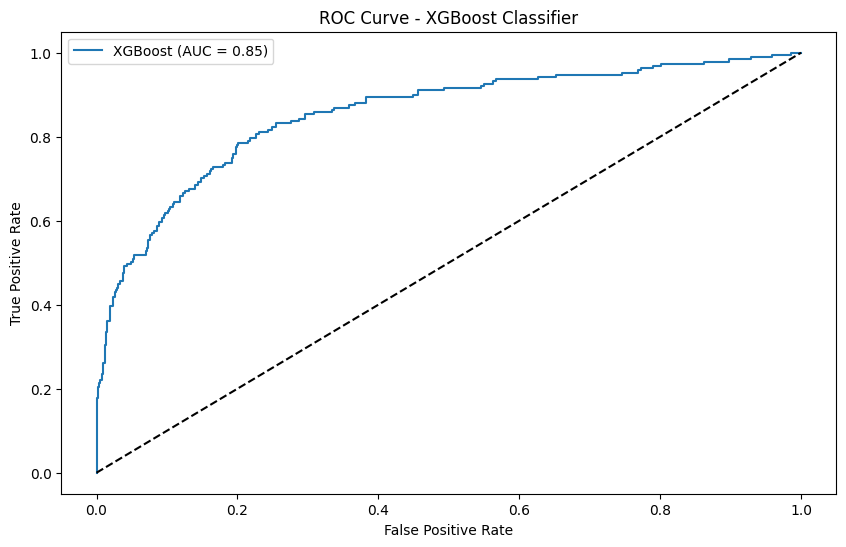

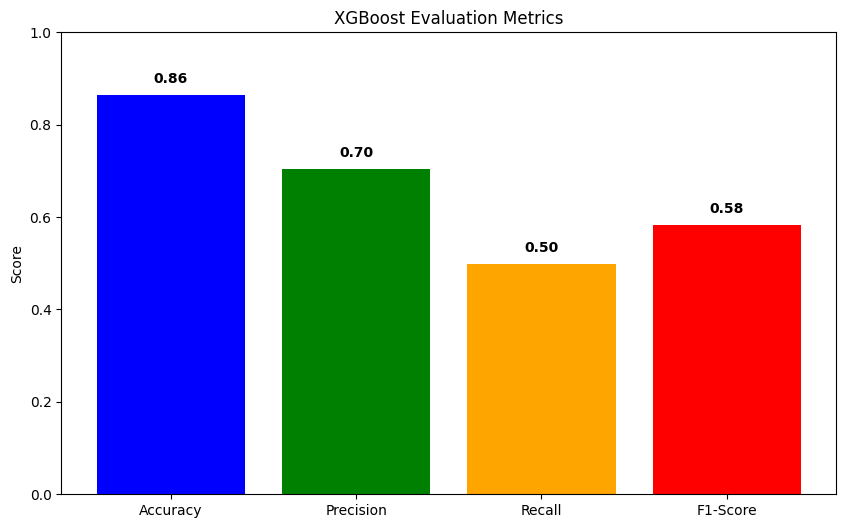

In [27]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Initialize and fit the XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train_classified)

# Predict the class labels for the test set
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Predict the probabilities for the positive class (required for ROC curve)
y_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Calculate accuracy, precision, recall, and F1-score
accuracy_xgb = accuracy_score(y_test_classified, y_pred_xgb)
precision_xgb = precision_score(y_test_classified, y_pred_xgb)
recall_xgb = recall_score(y_test_classified, y_pred_xgb)
f1_xgb = f1_score(y_test_classified, y_pred_xgb)

# Plot ROC curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test_classified, y_prob_xgb)
auc_xgb = roc_auc_score(y_test_classified, y_prob_xgb)

plt.figure(figsize=(10, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost Classifier")
plt.legend()
plt.show()

# Bar chart for Accuracy, Precision, Recall, and F1-Score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy_xgb, precision_xgb, recall_xgb, f1_xgb]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.title("XGBoost Evaluation Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom', fontweight='bold')
plt.show()


In [1]:
!pip install catboost




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
from catboost import CatBoostClassifier
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
Cb = CatBoostClassifier()
Cb.fit(X_train_scaled, y_train_classified)

Learning rate set to 0.026327
0:	learn: 0.6703212	total: 9.58ms	remaining: 9.57s
1:	learn: 0.6501291	total: 18.2ms	remaining: 9.09s
2:	learn: 0.6325476	total: 29.9ms	remaining: 9.94s
3:	learn: 0.6159900	total: 40.4ms	remaining: 10.1s
4:	learn: 0.6007075	total: 52ms	remaining: 10.3s
5:	learn: 0.5845152	total: 64.2ms	remaining: 10.6s
6:	learn: 0.5707654	total: 72.8ms	remaining: 10.3s
7:	learn: 0.5573071	total: 84.4ms	remaining: 10.5s
8:	learn: 0.5465432	total: 94.2ms	remaining: 10.4s
9:	learn: 0.5359217	total: 105ms	remaining: 10.4s
10:	learn: 0.5234695	total: 114ms	remaining: 10.3s
11:	learn: 0.5146958	total: 124ms	remaining: 10.2s
12:	learn: 0.5041465	total: 133ms	remaining: 10.1s
13:	learn: 0.4965341	total: 140ms	remaining: 9.86s
14:	learn: 0.4876846	total: 147ms	remaining: 9.65s
15:	learn: 0.4803502	total: 154ms	remaining: 9.46s
16:	learn: 0.4740301	total: 161ms	remaining: 9.33s
17:	learn: 0.4664712	total: 169ms	remaining: 9.21s
18:	learn: 0.4595885	total: 176ms	remaining: 9.11s
19:	

In [55]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy8 = Cb.score(X_test_scaled, y_test_classified)
print("Model Accuracy:", accuracy8)

Model Accuracy: 0.867


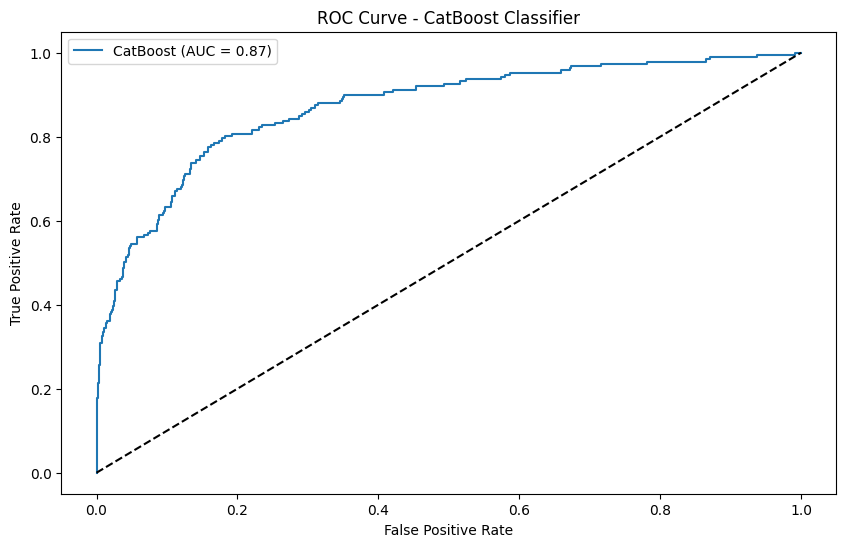

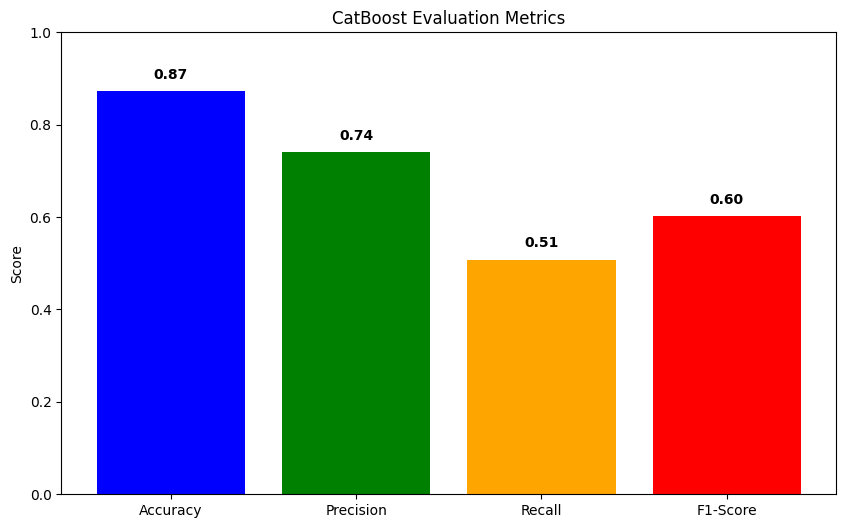

In [41]:
from catboost import CatBoostClassifier


# Initialize and fit the CatBoost Classifier
cat_model = CatBoostClassifier(verbose=0, random_state=42)  # Suppress training output with `verbose=0`
cat_model.fit(X_train_scaled, y_train_classified)

# Predict the class labels for the test set
y_pred_cat = cat_model.predict(X_test_scaled)

# Predict the probabilities for the positive class (required for ROC curve)
y_prob_cat = cat_model.predict_proba(X_test_scaled)[:, 1]

# Calculate accuracy, precision, recall, and F1-score
accuracy_cat = accuracy_score(y_test_classified, y_pred_cat)
precision_cat = precision_score(y_test_classified, y_pred_cat)
recall_cat = recall_score(y_test_classified, y_pred_cat)
f1_cat = f1_score(y_test_classified, y_pred_cat)

# Plot ROC curve
fpr_cat, tpr_cat, thresholds_cat = roc_curve(y_test_classified, y_prob_cat)
auc_cat = roc_auc_score(y_test_classified, y_prob_cat)

plt.figure(figsize=(10, 6))
plt.plot(fpr_cat, tpr_cat, label=f"CatBoost (AUC = {auc_cat:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - CatBoost Classifier")
plt.legend()
plt.show()

# Bar chart for Accuracy, Precision, Recall, and F1-Score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy_cat, precision_cat, recall_cat, f1_cat]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.title("CatBoost Evaluation Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom', fontweight='bold')
plt.show()


In [56]:
from sklearn.cluster import KMeans

In [57]:
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
Km = KMeans()
Km.fit(X_train_scaled, y_train_classified)

KMeans()

In [58]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy9 = Km.score(X_test_scaled, y_test_classified)
print("Model Accuracy:", accuracy9)

Model Accuracy: -7413.735200424097


In [75]:
from sklearn.naive_bayes import GaussianNB

In [76]:
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
Nb = GaussianNB()
Nb.fit(X_train_scaled, y_train_classified)

GaussianNB()

In [77]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy10 = Nb.score(X_test_scaled, y_test_classified)
print("Model Accuracy:", accuracy10)

Model Accuracy: 0.832


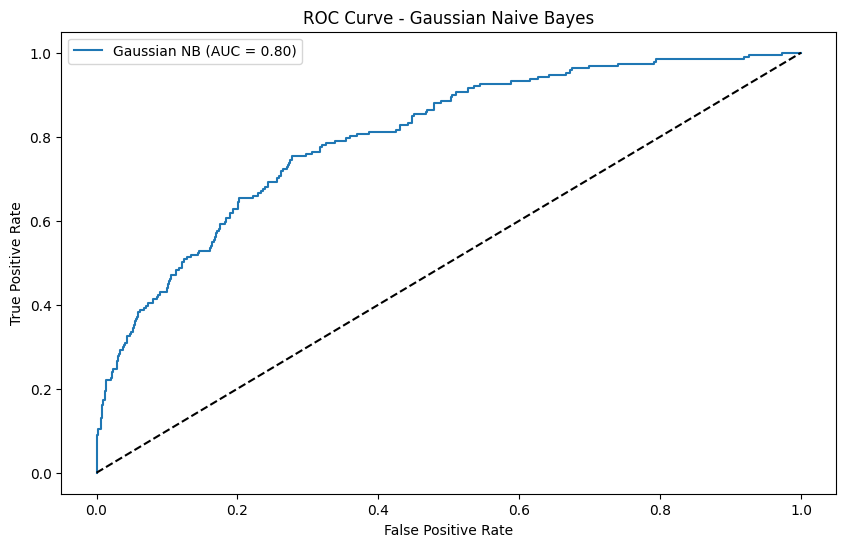

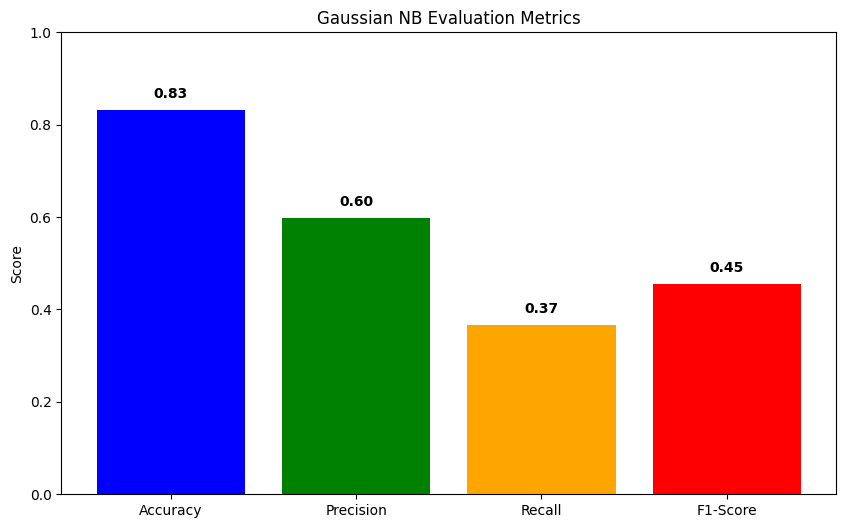

In [39]:
from sklearn.naive_bayes import GaussianNB


# Initialize and fit the Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train_classified)

# Predict the class labels for the test set
y_pred_gnb = gnb.predict(X_test_scaled)

# Predict probabilities for the positive class (required for ROC curve)
y_prob_gnb = gnb.predict_proba(X_test_scaled)[:, 1]

# Calculate accuracy, precision, recall, and F1-score
accuracy_gnb = accuracy_score(y_test_classified, y_pred_gnb)
precision_gnb = precision_score(y_test_classified, y_pred_gnb)
recall_gnb = recall_score(y_test_classified, y_pred_gnb)
f1_gnb = f1_score(y_test_classified, y_pred_gnb)

# Plot ROC curve
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test_classified, y_prob_gnb)
auc_gnb = roc_auc_score(y_test_classified, y_prob_gnb)

plt.figure(figsize=(10, 6))
plt.plot(fpr_gnb, tpr_gnb, label=f"Gaussian NB (AUC = {auc_gnb:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gaussian Naive Bayes")
plt.legend()
plt.show()

# Bar chart for Accuracy, Precision, Recall, and F1-Score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy_gnb, precision_gnb, recall_gnb, f1_gnb]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.title("Gaussian NB Evaluation Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom', fontweight='bold')
plt.show()


In [78]:
performance_summary = pd.DataFrame({
    'Model':['LR','svm','KNN','dt','rf','GBC','xb','Cb','Km','Nb'],
    'ACC':[accuracy1,
           accuracy2,
           accuracy3,
           accuracy4,
           accuracy5,
           accuracy6,
           accuracy7, 
           accuracy8, 
           accuracy9, 
           accuracy10

          ]
})
performance_summary

,Model,ACC
0,LR,0.8090
1,svm,0.8650
2,KNN,0.8650
3,dt,0.7990
4,rf,0.8400
5,GBC,0.8670
6,xb,0.8640
7,Cb,0.8670
8,Km,-7413.7352
9,Nb,0.8320
